In [15]:
from neqr_preparation_record_toffoli_v2 import neqr_info,qstate2circuit_by_record_toffoli
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister
from qiskit import execute, BasicAer
from numpy import binary_repr
from quantum_img_operation import add_comparator
from time import time

In [16]:
start=time()
start

1557337546.862985

In [17]:
files = ['in-4-graphics.png', 'out-4-graphics.png']
shot_times=80
color_n = 3
state_length, all_quantum_states = neqr_info(color_n, files, 'segmentation')
assist_n = 2
reg_counts = state_length + assist_n

qr = QuantumRegister(reg_counts, 'qr')
circuit = QuantumCircuit(qr)
# for i in range(color_n, state_length):
#     circuit.h(qr[i])

# for target_state in all_quantum_states[0]:
#     qstate2circuit_by_record_toffoli(circuit, qr, color_n, target_state,
#                                      state_length, reg_counts)

In [18]:
# circuit.draw(output='mpl')

In [19]:
all_quantum_states[0]

['0010000',
 '0010001',
 '1110010',
 '1110011',
 '0010100',
 '1000101',
 '0100110',
 '0000111',
 '0001000',
 '0111001',
 '1101010',
 '0011011',
 '1111100',
 '0001101',
 '1111110',
 '1111111']

In [20]:
c_qr = QuantumRegister(color_n + 3, 'c_qr')
circuit.add_register(c_qr)
qr_lst = [qr[i]
          for i in range(qr.size)] + [c_qr[i] for i in range(c_qr.size)]
if color_n % 2 == 1:
    state_cur = len(qr_lst) - 5
    judge_cur = len(qr_lst)-3
else:
    state_cur = len(qr_lst) - 3
    judge_cur = len(qr_lst) - 5

In [21]:
# circuit.draw(output='mpl')

In [22]:
cr = ClassicalRegister(reg_counts, 'cr')
c_cr = ClassicalRegister(color_n+3, 'c_cr')
circuit.add_register(cr)
circuit.add_register(c_cr)

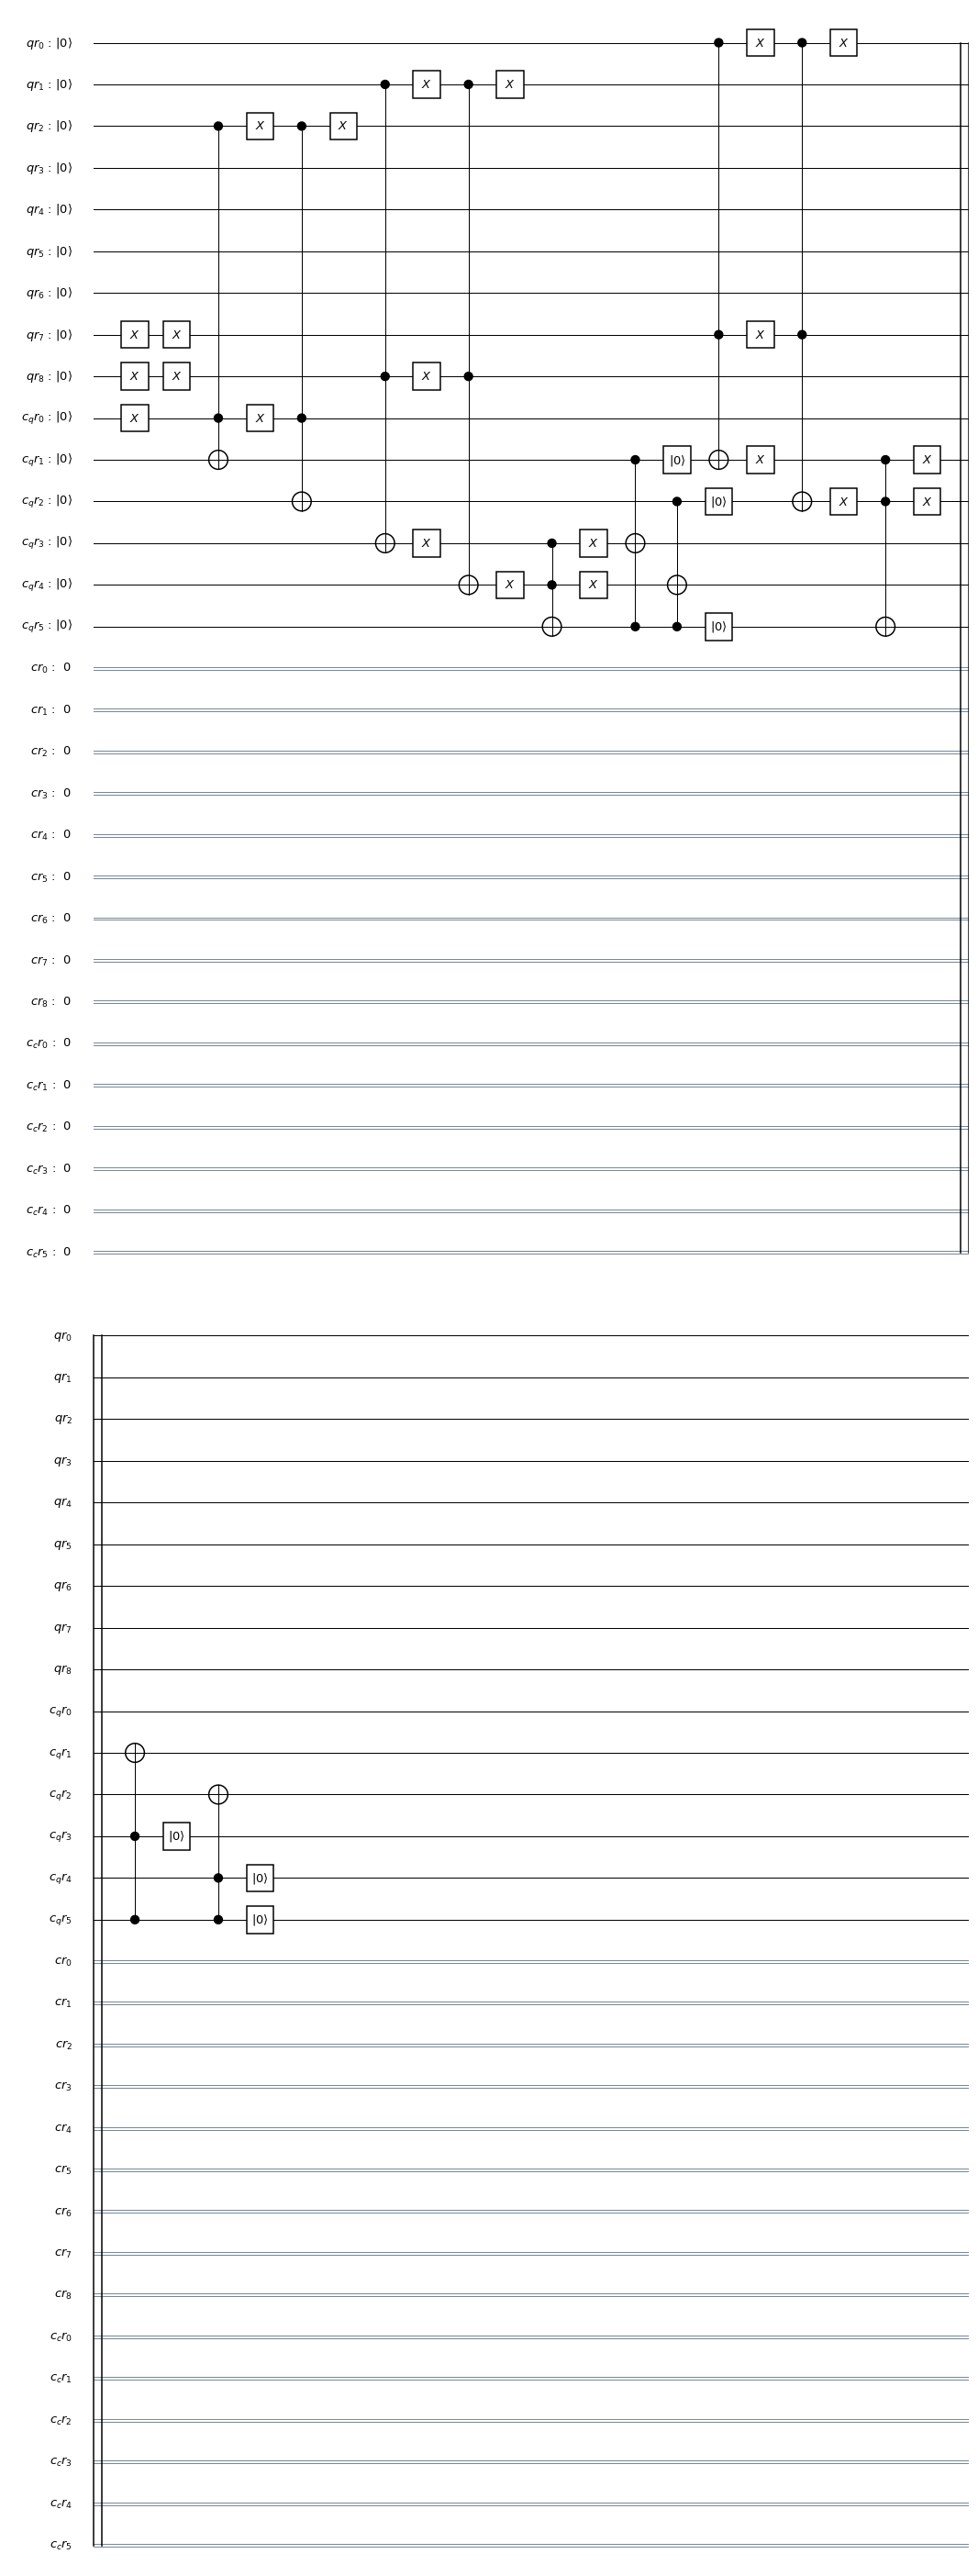

In [23]:
# add max vpt
circuit = add_comparator(color_n, 6, qr, c_qr,qr_lst, circuit, state_length)
circuit.draw(output='mpl')
# circuit.x(qr_lst[state_cur + 1])
# circuit.ccx(qr_lst[state_cur],qr_lst[state_cur+1],qr_lst[judge_cur])
# for i in range(color_n):
#     circuit.cx(qr_lst[i], qr_lst[-1])
#     circuit.ccx(qr_lst[-1], qr_lst[judge_cur], qr_lst[i])
#     circuit.reset(qr_lst[-1])

In [14]:
# reset comparand number 
cur=state_length
for i in range(color_n):
    circuit.reset(qr_lst[cur])
    cur+=1
# reset all comparison quantum bit
circuit.reset(qr_lst[judge_cur])
circuit.reset(qr_lst[state_cur])
circuit.reset(qr_lst[state_cur+1])

# add min vpt
circuit = add_comparator(color_n, 2, qr, c_qr,qr_lst, circuit, state_length)
circuit.x(qr_lst[state_cur])
circuit.ccx(qr_lst[state_cur],qr_lst[state_cur+1],qr_lst[judge_cur])
for i in range(color_n):
    circuit.cx(qr_lst[i], qr_lst[-1])
    circuit.ccx(qr_lst[-1], qr_lst[judge_cur], qr_lst[i])
    circuit.reset(qr_lst[-1])
circuit.draw(output='mpl')

In [11]:
circuit.measure(qr,cr)
circuit.measure(c_qr,c_cr)
backend=BasicAer.get_backend('qasm_simulator')
result=execute(circuit,backend,shots=shot_times).result()
counts=result.get_counts(circuit)
all_lst=list(counts.keys())
all_lst

['001110 100011000',
 '001110 100111000',
 '000000 101010001',
 '001110 100000000',
 '001110 100010000',
 '001110 101100000',
 '000000 100101011',
 '001110 100100000',
 '000010 100110010',
 '001110 101110000',
 '001110 101111000',
 '001110 101000000',
 '001110 101101000',
 '001110 101011000',
 '000000 101001110',
 '001110 100001000']

In [12]:
for i in all_lst:
    print(i[3:5][::-1],int(i[-3:][::-1],2))

11 0
11 0
00 4
11 0
11 0
11 0
00 6
11 0
10 2
11 0
11 0
11 0
11 0
11 0
00 3
11 0


In [13]:
segmentation_img_neqr=[]
for i in all_lst:
    segmentation_img_neqr.append(i[-state_length:][::-1])
# pos_n=(state_length-color_n)//2
# for i in [ i.split(' ')[-1][-state_length:][::-1] for i in all_lst]:
#     segmentation_img_neqr.append(i[:color_n]+i[color_n+pos_n:color_n+2*pos_n][::-1]+i[color_n:color_n+pos_n][::-1])
segmentation_img_neqr

['0001100',
 '0001110',
 '1000101',
 '0000000',
 '0000100',
 '0000011',
 '1101010',
 '0000010',
 '0100110',
 '0000111',
 '0001111',
 '0000001',
 '0001011',
 '0001101',
 '0111001',
 '0001000']

In [14]:
all_quantum_states[-1]

['0000000',
 '0000001',
 '0000010',
 '0000011',
 '0000100',
 '1000101',
 '0100110',
 '0000111',
 '0001000',
 '0111001',
 '1101010',
 '0001011',
 '0001100',
 '0001101',
 '0001110',
 '0001111']

In [15]:
sorted(all_quantum_states[-1])==sorted(segmentation_img_neqr)

True

In [16]:
end=time()
end-start

90.31486773490906

In [17]:
print(str(end-start)+" s")

90.31486773490906 s


In [18]:
print(str((end-start)/60)+' min')

1.5052477955818175 min
